In [96]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from os import listdir
from io import StringIO
import pickle
import datetime
import math

#First, identify the dates that we want
date1 = datetime.datetime(1996,12,19,18,30,5)
date2 = datetime.datetime(2000,3,7,16,30,5)


#Second, create the lists for those two days where we will store their values
day1=[]
day2=[]
#Third, scan the files for the right dates and time
with open('all_cmes.pkl', 'rb') as f:
    data = pickle.load(f)

ht_data=data['HT_DATA']
x=0
while (x<len(ht_data)):
    if (ht_data[x]['DATE_TIME'][0]==date1):
        day1=ht_data[x]
    elif (ht_data[x]['DATE_TIME'][0]==date2):
        day2=ht_data[x]
    x+=1
print (day1)
print (day2)


             DATE_TIME  HEIGHT  ANGLE TEL  FC    COL    ROW
0  1996-12-19 18:30:05    2.76  237.1  C2   1  345.0  194.0
1  1996-12-19 21:55:02    4.87  245.8  C2   1  427.0  174.0
2  1996-12-19 22:18:11    4.92  242.8  C3   1  297.0  246.0
3  1996-12-19 22:30:05    5.36  246.4  C2   1  445.0  168.0
4  1996-12-19 23:45:06    5.90  243.9  C3   1  305.0  243.0
5  1996-12-20 01:15:05    6.62  244.7  C3   1  311.0  241.0
6  1996-12-20 02:45:05    7.60  245.3  C3   1  319.0  238.0
7  1996-12-20 04:18:08    8.78  244.7  C3   1  328.0  233.0
8  1996-12-20 05:45:06    9.76  245.1  C3   1  336.0  230.0
9  1996-12-20 07:21:32   11.20  244.6  C3   1  347.0  224.0
10 1996-12-20 08:45:05   12.23  243.3  C3   1  354.0  218.0
11 1996-12-20 13:25:46   16.43  246.5  C3   1  390.0  209.0
12 1996-12-20 15:22:47   18.09  246.4  C3   1  403.0  203.0
             DATE_TIME  HEIGHT  ANGLE TEL  FC    COL    ROW
0  2000-03-07 16:30:05    3.72  113.3  C2   1  115.0  194.0
1  2000-03-07 16:54:05    5.73  114.6  C

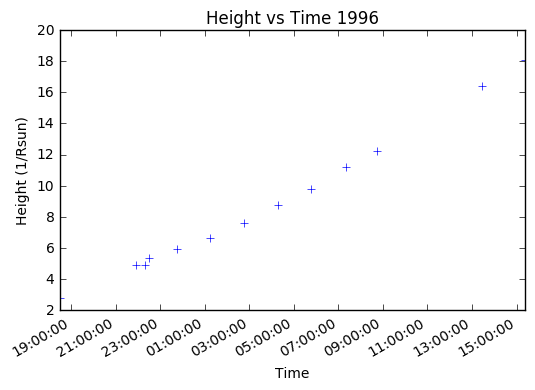

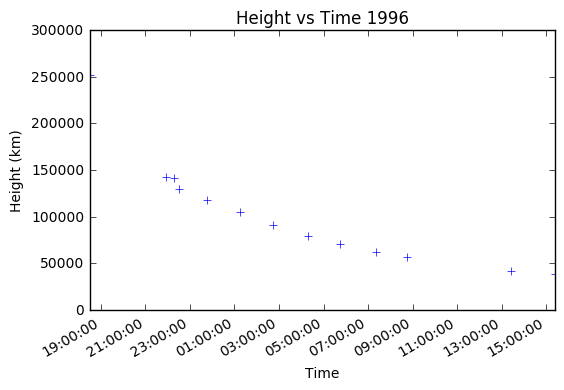

[ 186827.95698925  121291.44851658  104197.90104948   95994.47513812
   77914.79820628   65074.90636704   56458.16409423   43793.32073094
   41124.26035503   37710.25501899   33639.88383349   31547.88924194
   29828.32618026]


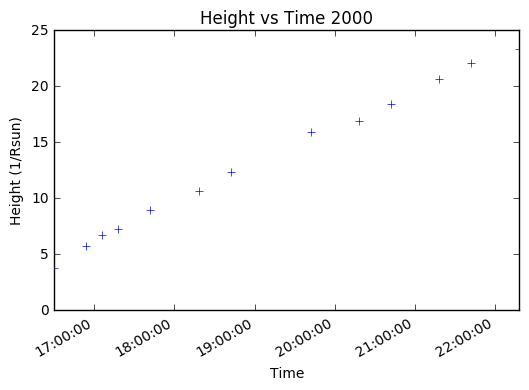

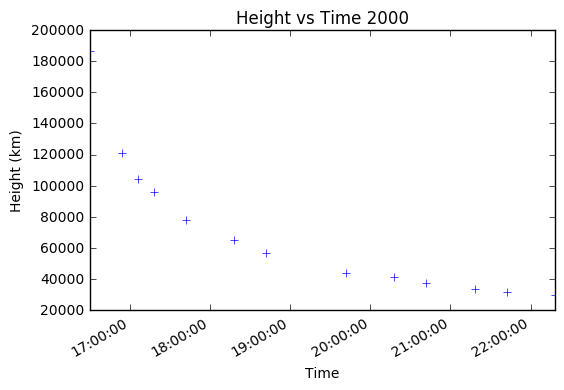

In [97]:
#Fourth, plot the height vs time
#1996
height_data1=day1['HEIGHT']
time_data1=day1['DATE_TIME']
diff_time_data1=np.diff(time_data1)

#create time array
t1_min=[]
x=0
while (x<len(time_data1)):
    r=time_data1[x]-time_data1[0]
    s=divmod(r.days * 86400 + r.seconds,60)
    s=int(round((s[0]+s[1]/60.0)))
    t1_min.append(s)
    x+=1

#convert height to km
height_data1_km=np.array(height_data1)
height_data1_km=695000*np.power(height_data1_km, -1)

plt.title("Height vs Time 1996")
plt.xlabel('Time')
plt.ylabel('Height (1/Rsun)')
plt.plot(time_data1, height_data1,'+')
plt.gcf().autofmt_xdate()
plt.show()

plt.title("Height vs Time 1996")
plt.xlabel('Time')
plt.ylabel('Height (km)')
plt.plot(time_data1, height_data1_km,'+')
plt.gcf().autofmt_xdate()
plt.show()

#plotting height vs time for 2000
height_data2=day2['HEIGHT']
time_data2=day2['DATE_TIME']
diff_time_data2=np.diff(time_data2)

#create time array
t2_min=[]
x=0
while (x<len(time_data2)):
    r=time_data2[x]-time_data2[0]
    s=divmod(r.days * 86400 + r.seconds,60)
    s=int(round((s[0]+s[1]/60.0)))
    t2_min.append(s)
    x+=1

#convert height to km
height_data2_km=np.array(height_data2)
height_data2_km=695000*np.power(height_data2_km, -1)
print (height_data2_km)

plt.title("Height vs Time 2000")
plt.xlabel('Time')
plt.ylabel('Height (1/Rsun)')
plt.plot(time_data2, height_data2,'+')
plt.gcf().autofmt_xdate()
plt.show()

plt.title("Height vs Time 2000")
plt.xlabel('Time')
plt.ylabel('Height (km)')
plt.plot(time_data2, height_data2_km,'+')
plt.gcf().autofmt_xdate()
plt.show()

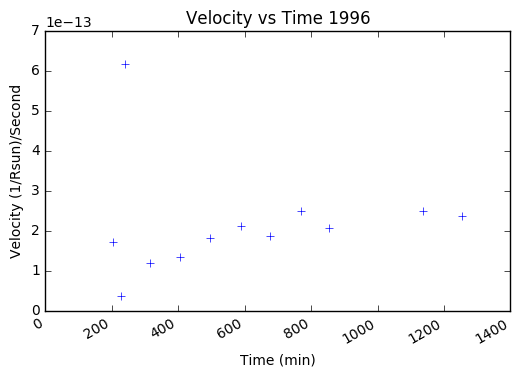

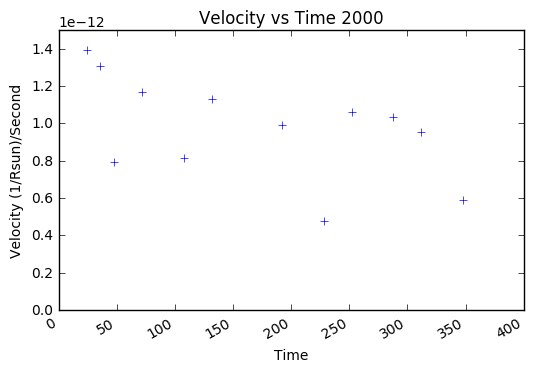

In [98]:
#Fifth, plot Velocity vs Time
#1996
diff_height_data1=np.diff(height_data1)
velocity1=diff_height_data1/diff_time_data1.astype(float)
#z=np.polyfit(t1_min[1:13], velocity1, 5)

plt.title("Velocity vs Time 1996")
plt.xlabel('Time (min)')
plt.ylabel('Velocity (1/Rsun)/Second')
plt.axis([0,1400,0, 7*math.pow(10,-13)])
plt.plot(t1_min[1:13], velocity1,'+') #one less data point
#plt.plot(z)
plt.gcf().autofmt_xdate()
plt.show()

#2000
diff_height_data2=np.diff(height_data2)
velocity2=diff_height_data2/diff_time_data2.astype(float)
#z=np.polyfit(t2_min[1:13], velocity2, 4)

plt.title("Velocity vs Time 2000")
plt.xlabel('Time')
plt.ylabel('Velocity (1/Rsun)/Second')
plt.axis([0,400, 0, 1.5*math.pow(10,-12)])
plt.plot(t2_min[1:13], velocity2,'+') #one less data point
#plt.plot(t2_min[1:12], z)
plt.gcf().autofmt_xdate()
plt.show()